<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:

df = pd.read_csv('/Users/wangrong/Desktop/3yrsNIK.csv', 
                 encoding='shift_jis', 
                 skipfooter=1)
                #  usecols=["Date of Data","Close"],
                #  index_col='Date of Data',
                #  parse_dates=True,
                #  engine='python')  
# df.index = pd.to_datetime(df.index)
df = df.sort_index()
                
df.head()

/var/folders/30/v4dylpfj5td9lqpsn5kfpkw40000gn/T/ipykernel_24827/1608158142.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/Users/wangrong/Desktop/3yrsNIK.csv',


,Date of Data,Close,Open,High,Low
0,2022/01/04,29301.79,29098.41,29323.79,28954.56
1,2022/01/05,29332.16,29288.80,29388.16,29204.45
2,2022/01/06,28487.87,29136.75,29158.95,28487.87
3,2022/01/07,28478.56,28711.53,28813.09,28293.70
4,2022/01/11,28222.48,28380.90,28473.47,28089.49


In [3]:
#drop first column
# df = df.drop(columns=['Date of Data'])

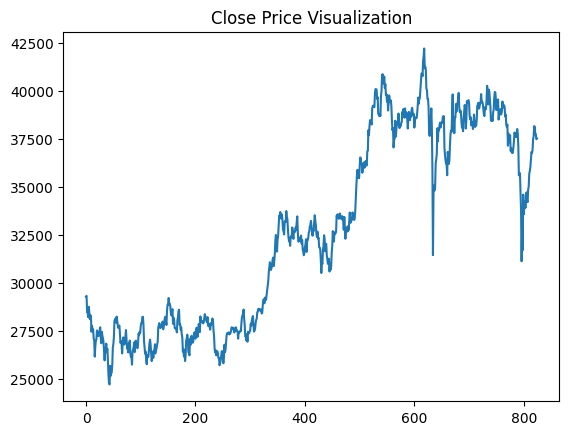

In [4]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [5]:
df

,Date of Data,Close,Open,High,Low
0,2022/01/04,29301.79,29098.41,29323.79,28954.56
1,2022/01/05,29332.16,29288.80,29388.16,29204.45
2,2022/01/06,28487.87,29136.75,29158.95,28487.87
3,2022/01/07,28478.56,28711.53,28813.09,28293.70
4,2022/01/11,28222.48,28380.90,28473.47,28089.49
...,...,...,...,...,...
820,2025/05/14,38128.13,38199.03,38325.88,37851.80
821,2025/05/15,37755.51,37832.36,37876.84,37633.36
822,2025/05/16,37753.72,37748.58,37786.43,37479.21
823,2025/05/19,37498.63,37572.36,37656.23,37445.93


# Plotting moving averages of 100 day

---



In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
820    37609.6834
821    37593.5162
822    37572.5620
823    37552.8439
824    37533.5639
Name: Close, Length: 825, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

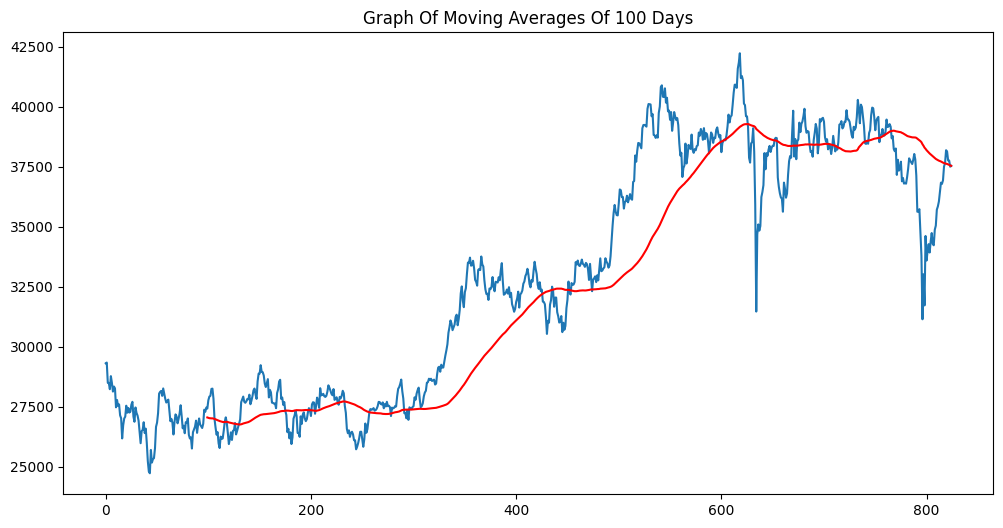

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
820    37884.73855
821    37868.02765
822    37856.16450
823    37843.33870
824    37832.99115
Name: Close, Length: 825, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

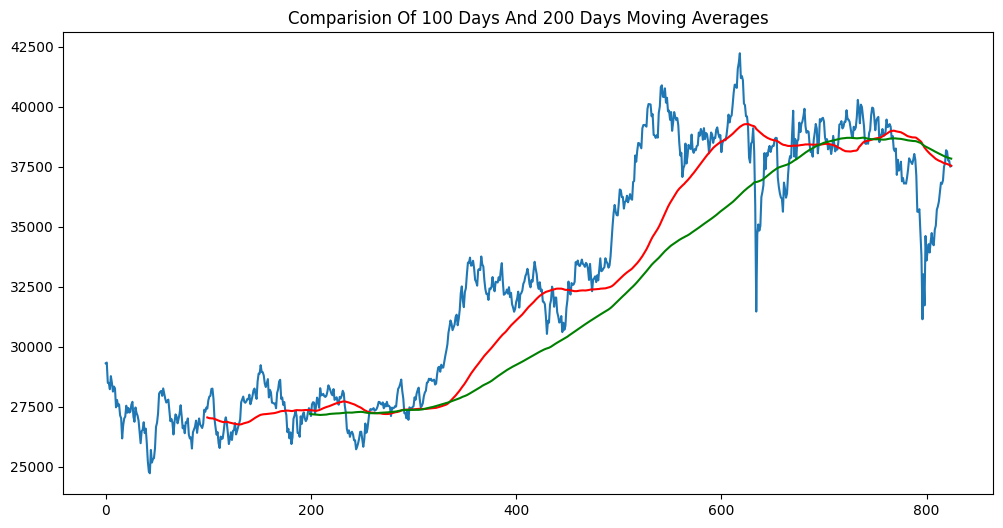

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [10]:
df.shape

(825, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [11]:
# Splitting data into training and testing
data = df.values
# data = data.astype('float32')

# Converting to DataFrame
# Splitting the data into training and testing sets

train = pd.DataFrame(df[0:int(len(data)*0.70)])
test = pd.DataFrame(df[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(577, 5)
(248, 5)


In [12]:
train.head()

,Date of Data,Close,Open,High,Low
0,2022/01/04,29301.79,29098.41,29323.79,28954.56
1,2022/01/05,29332.16,29288.80,29388.16,29204.45
2,2022/01/06,28487.87,29136.75,29158.95,28487.87
3,2022/01/07,28478.56,28711.53,28813.09,28293.70
4,2022/01/11,28222.48,28380.90,28473.47,28089.49


In [13]:
test.head()

,Date of Data,Close,Open,High,Low
577,2024/05/15,38385.73,38533.09,38816.60,38335.61
578,2024/05/16,38920.26,38645.96,38949.38,38513.33
579,2024/05/17,38787.38,38561.04,38842.49,38539.56
580,2024/05/20,39069.68,38761.71,39437.16,38703.70
581,2024/05/21,38946.93,39232.16,39346.15,38942.28


# Using MinMax scaler for normalization of the dataset

---



In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
train_close = train.iloc[:, 1:2].values
test_close = test.iloc[:, 1:2].values

In [16]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.28348824],
       [0.28536631],
       [0.23315585],
       [0.23258013],
       [0.21674428],
       [0.25033424],
       [0.23323377],
       [0.21067164],
       [0.22361093],
       [0.21889443],
       [0.17004001],
       [0.18894434],
       [0.17344304],
       [0.17753124],
       [0.14926875],
       [0.14184739],
       [0.08983854],
       [0.1236672 ],
       [0.14126919],
       [0.14599991],
       [0.1741443 ],
       [0.15606924],
       [0.1683555 ],
       [0.15653674],
       [0.15874132],
       [0.17700561],
       [0.18419197],
       [0.14606856],
       [0.13281017],
       [0.16961765],
       [0.15554731],
       [0.1486955 ],
       [0.135635  ],
       [0.10711092],
       [0.0775028 ],
       [0.10877379],
       [0.11188555],
       [0.13154432],
       [0.10361204],
       [0.11500535],
       [0.07840875],
       [0.03115968],
       [0.00454025],
       [0.        ],
       [0.06016177],
       [0.02753403],
       [0.03650508],
       [0.038

In [17]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [18]:
x_train.shape

(477, 100, 1)

# ML Model (LSTM)

---



In [19]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.1662 - mean_absolute_error: 0.3243
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0381 - mean_absolute_error: 0.1519
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0187 - mean_absolute_error: 0.1041
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0160 - mean_absolute_error: 0.0934
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0122 - mean_absolute_error: 0.0801
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0115 - mean_absolute_error: 0.0756
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0104 - mean_absolute_error: 0.0725
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 0.0128 - mean_absolute_error: 0.0834
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0128 - mean_absolute_error: 0.0823
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 0.0105 - mean_absolute_error: 0.0734
Epoch 11/100
15/15 

In [23]:
model.save('keras_model.h5')


In [24]:
test_close.shape


(248, 1)

In [25]:
past_100_days = pd.DataFrame(train_close[-100:])


In [26]:
test_df = pd.DataFrame(test_close)


In [27]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [28]:
final_df.head()

,0
0,32926.35
1,32686.25
2,32970.55
3,32758.98
4,33219.39


# Training the model

---



In [29]:
# x_test = []
# y_test = []
# for i in range(100, len(data_training_array)):
#     x_test.append(data_training_array[i-100:i])
#     y_test.append(data_training_array[i, 0])
# x_test, y_test = np.array(x_test), np.array(y_test)

In [30]:
# model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
# model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)


In [31]:
# model.save('keras_model.h5')

In [32]:

# test_close.shape
# test_close

In [33]:
# past_100_days = pd.DataFrame(train_close[-100:])

In [34]:
# test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [35]:
# final_df = past_100_days.append(test_df, ignore_index = True)

In [36]:
# final_df.head()

In [37]:
input_data = scaler.fit_transform(final_df)
input_data


array([[0.1614232 ],
       [0.13976806],
       [0.16540969],
       [0.14632774],
       [0.1878531 ],
       [0.22903033],
       [0.18073514],
       [0.18331283],
       [0.19097736],
       [0.19565112],
       [0.22950834],
       [0.21673533],
       [0.20993034],
       [0.19406734],
       [0.20210617],
       [0.23689869],
       [0.29809767],
       [0.35294712],
       [0.40050093],
       [0.42978451],
       [0.40429531],
       [0.39153944],
       [0.39049501],
       [0.43532953],
       [0.48797288],
       [0.48532303],
       [0.459069  ],
       [0.45997002],
       [0.41619075],
       [0.44107206],
       [0.44458234],
       [0.46450127],
       [0.43967589],
       [0.45289445],
       [0.47058473],
       [0.45313255],
       [0.44945813],
       [0.51650336],
       [0.51958252],
       [0.61577695],
       [0.59226837],
       [0.63327152],
       [0.6629718 ],
       [0.66145116],
       [0.65182134],
       [0.64267135],
       [0.71811888],
       [0.730

In [38]:
input_data.shape

(348, 1)

# Testing the model

---



In [39]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(248, 100, 1)
(248,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [41]:
y_pred = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


In [42]:
y_pred.shape

(248, 1)

In [43]:
y_test

array([0.65381639, 0.7020268 , 0.69004207, 0.71550331, 0.70443222,
       0.67468415, 0.71852835, 0.67730062, 0.70020131, 0.69617423,
       0.66925187, 0.62390868, 0.66303132, 0.70227663, 0.69455889,
       0.66323606, 0.68247765, 0.68071169, 0.71266045, 0.72137572,
       0.69809893, 0.68400731, 0.69249349, 0.62826586, 0.66250911,
       0.67050464, 0.67612001, 0.67282348, 0.69159968, 0.72483549,
       0.76938319, 0.74002294, 0.76180796, 0.76613537, 0.80614732,
       0.85179086, 0.88181492, 0.88169947, 0.86982387, 0.94192979,
       0.96464197, 1.        , 0.90680085, 0.91441307, 0.89841388,
       0.81080664, 0.80516422, 0.76324381, 0.76282803, 0.72318497,
       0.6072574 , 0.58902957, 0.66129332, 0.66646313, 0.71840208,
       0.63042055, 0.43049793, 0.02902744, 0.31917918, 0.35653316,
       0.33322119, 0.35070494, 0.45961286, 0.47854599, 0.5041795 ,
       0.62467892, 0.5638849 , 0.62470146, 0.61467931, 0.63805802,
       0.65188087, 0.62896755, 0.64505783, 0.65255641, 0.65172

In [44]:
y_pred

array([[0.668517  ],
       [0.6728018 ],
       [0.67758423],
       [0.6831234 ],
       [0.6897641 ],
       [0.6974028 ],
       [0.7052805 ],
       [0.7132425 ],
       [0.72060055],
       [0.72710365],
       [0.7326112 ],
       [0.73673296],
       [0.73866445],
       [0.738493  ],
       [0.73712224],
       [0.7353401 ],
       [0.7333171 ],
       [0.7313387 ],
       [0.72958654],
       [0.7285765 ],
       [0.72876465],
       [0.7300277 ],
       [0.73187125],
       [0.7339207 ],
       [0.7350599 ],
       [0.7349539 ],
       [0.73372704],
       [0.7317584 ],
       [0.7294071 ],
       [0.7272172 ],
       [0.7260242 ],
       [0.7269537 ],
       [0.7302112 ],
       [0.73581874],
       [0.74346954],
       [0.7531498 ],
       [0.76520395],
       [0.7799331 ],
       [0.7970032 ],
       [0.815336  ],
       [0.8347406 ],
       [0.8550512 ],
       [0.8762132 ],
       [0.8961627 ],
       [0.9132561 ],
       [0.9263492 ],
       [0.93380076],
       [0.935

In [45]:
scaler.scale_

array([9.01921453e-05])

In [46]:
scale_factor = 1/9.01921453e-05
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

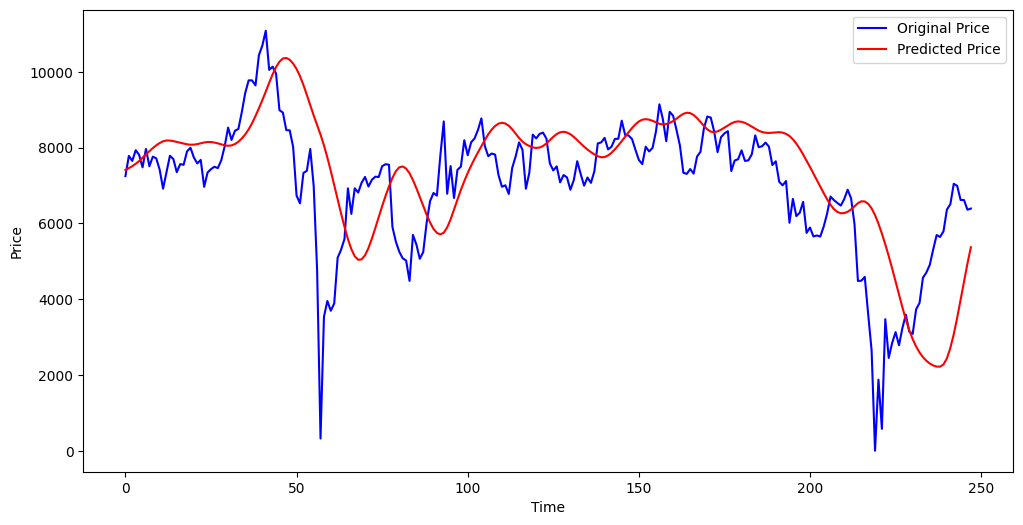

In [47]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [48]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.09729023681737459


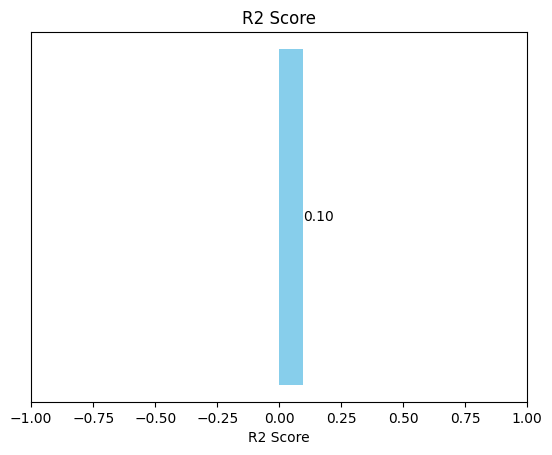

In [49]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

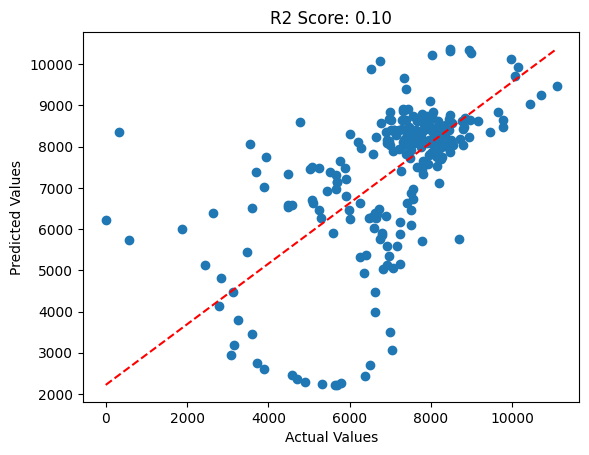

In [50]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

In [51]:
#mae and rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)



Mean Absolute Error: 1195.059926868598
Root Mean Squared Error: 1641.1808758336801
